In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
import seaborn as sns


In [4]:
# Load the dataset using pandas
df = pd.read_csv('./laptop_price.csv', encoding='ISO-8859-1')


In [5]:
# Display the first few rows of the dataframe
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
# Data Exploration
# Check for missing values
df.isnull().sum()


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
# Data Preprocessing
# Clean the 'Weight' column
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [8]:
# Clean the 'Ram' column
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


In [ ]:
# Drop rows with missing values (if any)
df = df.dropna()


In [9]:
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Company', 'Product', 'TypeName', 'OpSys'], drop_first=True)


In [10]:
# Selecting features (Weight, Ram, Inches) and target variable (Price_euros)
X = df[['Weight', 'Ram', 'Inches']]
y = df['Price_euros']


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model Training
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)


In [13]:
# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [14]:
# Model Evaluation
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [16]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 280.24822947402964
Mean Squared Error: 189570.79019420673
R^2 Score: 0.6267751713083446


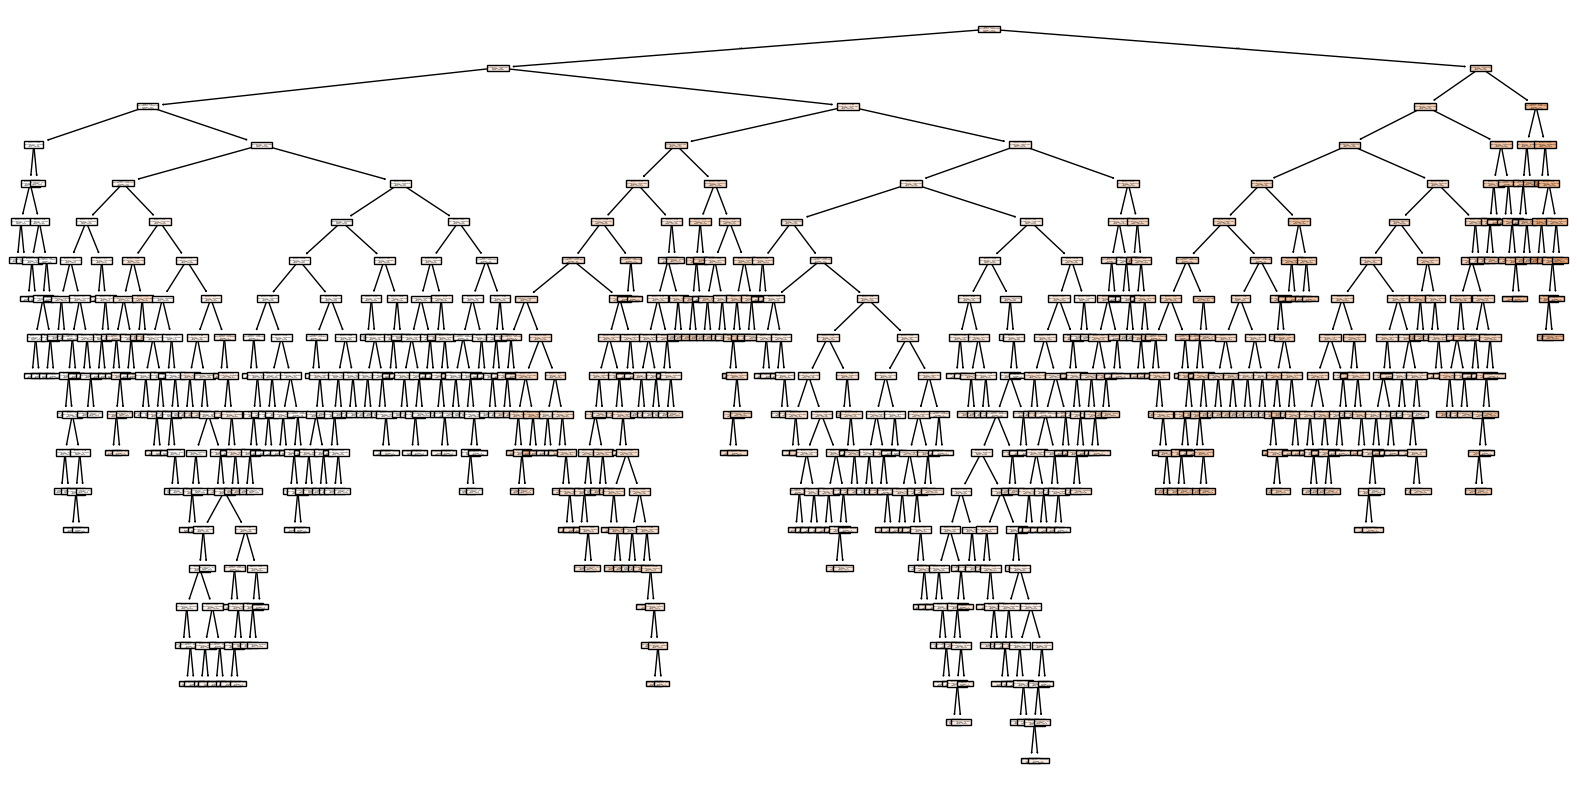

In [17]:
# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=['Weight', 'Ram', 'Inches'], filled=True)
plt.show()


In [18]:
# Predictions
# Making predictions on new data (example)
new_data = pd.DataFrame({'Weight': [1.5], 'Ram': [8], 'Inches': [13.3]})
prediction = model.predict(new_data)
print(f"Predicted Price (euros): {prediction[0]}")

Predicted Price (euros): 1010.0


In [19]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']